In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### Required functions

In [2]:
def get_5_number_summary(data):
    data = np.array(data)
    quartiles = np.percentile(data, [25, 50, 75])
    data_min, data_max = data.min(), data.max()
    IQR = quartiles[2] - quartiles[0]
    lower_w = quartiles[0] - 1.5 * IQR
    upper_w = quartiles[2] + 1.5 * IQR
    print(f'Min: {data_min:.3f}')
    print(f'Q1-1.5IQR: {lower_w:.3f}')
    print(f'Q1: {quartiles[0]:.3f}')
    print(f'Median: {quartiles[1]:.3f}')
    print(f'Q3: {quartiles[2]:.3f}')
    print(f'Q3+1.5IQR: {upper_w:.3f}')
    print(f'Max: {data_max:.3f}')
    
def get_mean_variance(data):
    n_A = len(data)
    print(f'There are {n_A} points.')
    mean = np.mean(data)
    print(f'mean of A set is {mean:.2f}')
    summation = 0
    for a in data:
        summation += np.square(a - mean)
        variance = summation / (n_A-1)
    print(f's^2 of A set is {variance:.2f}')
    variance_np = np.var(data, ddof=1)
    print(f'By numpy, s^2 of A set is {variance:.2f}')
    
def get_CV(data):
    mean = np.mean(data)
    S = np.std(data, ddof=1)
    CV = (S / mean) * 100
    print(f'mean is {mean:.3f}.')
    print(f'S is {S:.3f}.')
    print(f'CV is {CV:.3f} %.')
    
def fahrenheit_to_celsius(f):
    return (f - 32) * 5/9

def celsius_to_kelvin(c):
    return c + 273.15

## Question 1: The one about drug therapy

In [6]:
A_set = [105, 126, 120, 119, 133, 145, 200,
         123, 108, 112, 132, 136, 156, 
         12.4, 134, 130, 130, 142, 170]
R_set = [221, 261, 250, 230, 253, 256, 
         227, 264, 236, 246, 273, 271, 
         280, 238, 240, 283, 516]

In [4]:
get_5_number_summary(A_set)

Min: 12.400
Q1-1.5IQR: 90.250
Q1: 119.500
Median: 130.000
Q3: 139.000
Q3+1.5IQR: 168.250
Max: 200.000


#### (a) Construct a side-by-side box plot and identify outliers.
##### First, we need summaries for two sets(A and R), respectively.  
|   |  Minimum |Q1-1.5IQR | Q1  | Median | Q3 | Q3+1.5IQR | Maximum |
|---|---|-------|-------|---|----|----|---|
| $T_{\mathrm{max}}(A)$  | 12.4 | 90.25 | 119.5  | 130  | 139 | 168.25 | 200 |
| $T_{\mathrm{max}}(R)$  | 221  | 188.5 | 238  | 253 | 271 | 320.5 |516|

##### Then, we can create boxplots for them.

In [7]:
xlist_A = [1] * len(A_set)
xlist_R = [2] * len(R_set)

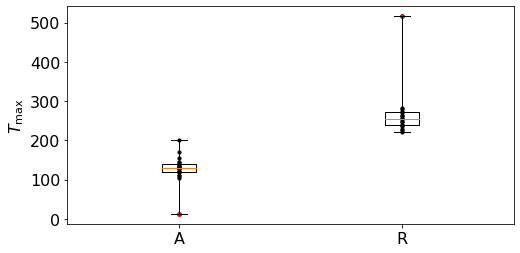

In [30]:
lbfz = 16

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

combines = [A_set, R_set]

d_box = ax.boxplot(combines, whis=(0,100))

ax.set_ylabel('$T_{\mathrm{max}}$', fontsize=lbfz)
ax.set_xticklabels(['A', 'R'])
ax.tick_params(axis='both', labelsize=lbfz)
#ax.axhline(516, color='red', alpha=0.4)

ax.scatter(xlist_A, A_set, s=10, color='black')
ax.scatter([1], [12.4], s=14, marker='o', color='red')

ax.scatter(xlist_R, R_set, s=10, color='black')
ax.scatter([2], [516], s=14, color='red')
#plt.savefig('q1_boxplots_v1.png', dpi=200)
plt.show()

<h4 style="color:blue">(b) Calculate $\overline{x}$ and $s^2$ for the data of set A.</h4> 

In [15]:
get_mean_variance(A_set)

There are 19 points.
mean of A set is 128.07
s^2 of A set is 1282.68
By numpy, s^2 of A set is 1282.68


<h4 style="color:blue">(c) Assume that the outlier of set A is the result of a misplaced decimal point. Correct the error by deleting the decimal and see what changes this makes in your box plot. Recompute $\overline{x}$ and $s^2$ , using the correct data point, and compare your results to those of part b.</h4> 

In [2]:
A_set_refine = [105, 126, 120, 119, 133, 145, 200,
                123, 108, 112, 132, 136, 156, 
                124, 134, 130, 130, 142, 170]

In [8]:
xlist_A = [1] * len(A_set)
xlist_A_refine = [2] * len(A_set_refine)

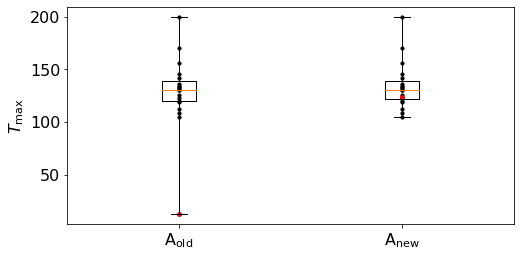

In [11]:
lbfz = 16

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

combines = [A_set, A_set_refine]

d_box = ax.boxplot(combines, whis=(0,100))

ax.set_ylabel('$T_{\mathrm{max}}$', fontsize=lbfz)
ax.set_xticklabels(['A$_{\mathrm{old}}$', 'A$_{\mathrm{new}}$'])
ax.tick_params(axis='both', labelsize=lbfz)
#ax.axhline(516, color='red', alpha=0.4)

ax.scatter(xlist_A, A_set, s=10, color='black')
ax.scatter([1], [12.4], s=14, marker='o', color='red')

ax.scatter(xlist_A_refine, A_set_refine, s=10, color='black')
ax.scatter([2], [124], s=14, color='red')
#plt.savefig('q1_boxplots_v2.png', dpi=200)
plt.show()

In [16]:
get_mean_variance(A_set_refine)

There are 19 points.
mean of A set is 133.95
s^2 of A set is 503.83
By numpy, s^2 of A set is 503.83


<h2 style="color:blue">Question 2: The data sets below are temperature readings from two different sensors (a Celsius sensor and a Fahrenheit sensor). Which sensor is better by picking the one with the least variance.</h2>

In [14]:
celsius = [0, 10, 20, 30, 40] # unit: celsius
fahrenheit = [32, 50, 68, 86, 104] # unit: fahrenheit

In [4]:
get_CV(celsius)

mean is 20.000.
S is 15.811.
CV is 79.057 %.


In [12]:
get_CV(fahrenheit)

mean is 68.000.
S is 28.460.
CV is 41.854 %.


In [15]:
f_by_c = [fahrenheit_to_celsius(f) for f in fahrenheit]
c_by_k = [celsius_to_kelvin(c) for c in celsius]
f_by_k = [celsius_to_kelvin(f) for f in f_by_c]

In [17]:
c_by_k

[273.15, 283.15, 293.15, 303.15, 313.15]

In [16]:
f_by_k

[273.15, 283.15, 293.15, 303.15, 313.15]

In [18]:
get_CV(c_by_k)

mean is 293.150.
S is 15.811.
CV is 5.394 %.


<h2 style="color:blue">Question 3: Coevolution</h2>

In [21]:
def process_data(data):
    original = f'{data:.2f}'
    round_one = f'{data:.1f}'
    stem = round_one[:2]
    leaf = round_one[-1]
    return original, round_one, stem, leaf

def make_dataframe(data_list):
    columns = ['Original', 'Round', 'Stem', 'Leaf']
    d_result = {'Original': list(), 'Round': list(), 'Stem': list(), 'Leaf': list()}
    for data in data_list:
        original, round_one, stem, leaf = process_data(data)
        d_result['Original'].append(original)
        d_result['Round'].append(round_one)
        d_result['Stem'].append(stem)
        d_result['Leaf'].append(leaf)
    df = pd.DataFrame(d_result)
    df = df.sort_values(by=['Original'])
    s = pd.Series(list(range(1, len(data_list)+1)))
    df = df.set_index(s)
    return df[columns]

In [22]:
H_red = [41.90, 42.01, 41.93, 43.09, 41.47, 41.69, 39.78, 40.57,
         39.63, 42.18, 40.66, 37.87, 39.16, 37.40, 38.20, 38.07, 
         38.10, 37.97, 38.79, 38.23, 38.87, 37.78, 38.01]
H_yellow = [36.78, 37.02, 36.52, 36.11, 36.03, 35.45, 38.13, 37.1,
            35.17, 36.82, 36.66, 35.68, 36.03, 34.57, 34.63]

In [23]:
df_red = make_dataframe(H_red)
df_yellow = make_dataframe(H_yellow)

In [24]:
df_red

,Original,Round,Stem,Leaf
1,37.40,37.4,37,4
2,37.78,37.8,37,8
3,37.87,37.9,37,9
4,37.97,38.0,38,0
5,38.01,38.0,38,0
6,38.07,38.1,38,1
7,38.10,38.1,38,1
8,38.20,38.2,38,2
9,38.23,38.2,38,2
10,38.79,38.8,38,8


In [25]:
df_yellow

,Original,Round,Stem,Leaf
1,34.57,34.6,34,6
2,34.63,34.6,34,6
3,35.17,35.2,35,2
4,35.45,35.5,35,5
5,35.68,35.7,35,7
6,36.03,36.0,36,0
7,36.03,36.0,36,0
8,36.11,36.1,36,1
9,36.52,36.5,36,5
10,36.66,36.7,36,7


Reference: https://www.ck12.org/statistics/two-sided-stem-and-leaf-plots/lesson/Two-Sided-Stem-and-Leaf-Plots-BSC-PST/

In [20]:
# Round and to string
H_red_round_str = [f'{data:.1f}' for data in H_red]
H_red_round = [float(data) for data in H_red_round_str]

# Get smallest
minimum = np.min(H_red)
minimum_str = f'{minimum}'
minimum_int = int(minimum_str[:2])

# Get largest
maximum = np.max(H_red)
maximum_str = f'{maximum}'
maximum_int = int(maximum_str[:2])

# Initialize data container
d_result_red = dict()

# Start Process
for lower_bound in range(minimum_int, maximum_int+1):
    upper_bound = lower_bound + 1
    # lower_bound <= i < upper_bound
    d_result_red[lower_bound] = [f'{data:.1f}' for data in H_red_round if ((data >= lower_bound) & (data < upper_bound))]

In [21]:
d_result_red

{37: ['37.9', '37.4', '37.8'],
 38: ['38.2', '38.1', '38.1', '38.0', '38.8', '38.2', '38.9', '38.0'],
 39: ['39.8', '39.6', '39.2'],
 40: ['40.6', '40.7'],
 41: ['41.9', '41.9', '41.5', '41.7'],
 42: ['42.0', '42.2'],
 43: ['43.1']}

In [22]:
# Round and to string
H_yellow_round_str = [f'{data:.1f}' for data in H_yellow]
H_yellow_round = [float(data) for data in H_yellow_round_str]

# Get smallest
minimum = np.min(H_yellow)
minimum_str = f'{minimum}'
minimum_int = int(minimum_str[:2])

# Get largest
maximum = np.max(H_yellow)
maximum_str = f'{maximum}'
maximum_int = int(maximum_str[:2])

# Initialize data container
d_result_yellow = dict()

# Start Process
for lower_bound in range(minimum_int, maximum_int+1):
    upper_bound = lower_bound + 1
    # lower_bound <= i < upper_bound
    d_result_yellow[lower_bound] = [f'{data:.1f}' for data in H_yellow_round if ((data >= lower_bound) & (data < upper_bound))]

In [23]:
d_result_yellow

{34: ['34.6', '34.6'],
 35: ['35.5', '35.2', '35.7'],
 36: ['36.8', '36.5', '36.1', '36.0', '36.8', '36.7', '36.0'],
 37: ['37.0', '37.1'],
 38: ['38.1']}

In [14]:
get_5_number_summary(H_yellow)

Min: 34.570
Q1-1.5IQR: 33.712
Q1: 35.565
Median: 36.110
Q3: 36.800
Q3+1.5IQR: 38.652
Max: 38.130


In [6]:
len(H_red)

23